In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
# import function to perform feature selection
from sklearn.feature_selection import RFE

In [2]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
import random

In [31]:
train=pd.read_csv('train_s3TEQDk.csv')
test=pd.read_csv('test_mSzZ8RL.csv')

In [20]:
train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [33]:
train['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [5]:
train.shape

(245725, 11)

In [5]:
test.shape

(105312, 10)

In [15]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [18]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [21]:
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
print(percent)

Credit_Product         0.118904
Is_Active              0.000000
Avg_Account_Balance    0.000000
Vintage                0.000000
Channel_Code           0.000000
Occupation             0.000000
Region_Code            0.000000
Age                    0.000000
Gender                 0.000000
ID                     0.000000
dtype: float64


In [12]:
test.isnull().sum().sort_values(ascending=False)

Credit_Product         12522
Is_Active                  0
Avg_Account_Balance        0
Vintage                    0
Channel_Code               0
Occupation                 0
Region_Code                0
Age                        0
Gender                     0
ID                         0
dtype: int64

In [6]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [26]:
train.duplicated().sum()

0

In [7]:
#Remove ID
#get dummies Gender
#First let as it and then group it by variable
#Region -Doubt
#Occupation-get dummies
#Channel_Code-get dummies
#Vintage-Doubt
#Credit_Product-get dummies
#Avg_Account_Balance-
#Is_Active-get dummies
#Is_Lead-target variable

In [8]:
train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [9]:
train.Credit_Product.isnull().value_counts()

False    216400
True      29325
Name: Credit_Product, dtype: int64

In [10]:
train.Credit_Product.value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [11]:
print(train['Credit_Product'].value_counts())
print('******************************************')
print(test['Credit_Product'].value_counts())

No     144357
Yes     72043
Name: Credit_Product, dtype: int64
******************************************
No     61608
Yes    31182
Name: Credit_Product, dtype: int64


In [93]:
train['Credit_Product']=train['Credit_Product'].fillna('Yes')

In [94]:
test['Credit_Product']=test['Credit_Product'].fillna('Yes')

In [14]:
# Credit Product has 11% of missing data

In [15]:
#train.dropna(inplace=True)
#test.dropna(inplace=True)

In [95]:
train['Is_Active']=train['Is_Active'].map({'Yes':1,'No':0,})
test['Is_Active']=test['Is_Active'].map({'Yes':1,'No':0,})

In [96]:
train['Credit_Product']=train['Credit_Product'].map({'Yes':1,'No':0,})
test['Credit_Product']=test['Credit_Product'].map({'Yes':1,'No':0,})

In [97]:
train['Gender']=train['Gender'].map({'Male':1,'Female':0,})
test['Gender']=test['Gender'].map({'Male':1,'Female':0,})

In [98]:
train['Avg_Account_Balance']=np.log(train['Avg_Account_Balance'])
test['Avg_Account_Balance']=np.log(test['Avg_Account_Balance'])

In [99]:
train['Vintage']=np.log(train['Vintage'])
test['Vintage']=np.log(test['Vintage'])

In [20]:
train.Channel_Code.value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

In [100]:
le = LabelEncoder()
train['Region_Code'] = le.fit_transform(train['Region_Code'])
test['Region_Code'] = le.fit_transform(test['Region_Code'])

In [101]:
train.drop('ID',axis=1,inplace=True)
test.drop('ID',axis=1,inplace=True)

In [102]:
train.drop('Region_Code',axis=1,inplace=True)
test.drop('Region_Code',axis=1,inplace=True)

In [103]:
train_cat = train.select_dtypes(include='object')
test_car = test.select_dtypes(include='object')

In [104]:
train_num = train.select_dtypes(exclude='object')
test_num = test.select_dtypes(exclude='object')

In [105]:
train_dummy = pd.get_dummies(data = train_cat, drop_first = True)

In [106]:
test_dummy = pd.get_dummies(data = test_car, drop_first = True)

In [107]:
train_feature.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,0,73,43,0,13.860193,0,0,1,0,0,0,1,0
1,0,30,32,0,13.274205,0,0,0,1,0,0,0,0
2,0,56,26,0,14.210464,1,0,0,0,1,0,1,0
3,1,34,19,0,13.061453,0,0,0,1,0,0,0,0
4,0,30,33,0,13.695360,0,0,0,1,0,0,0,0


C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


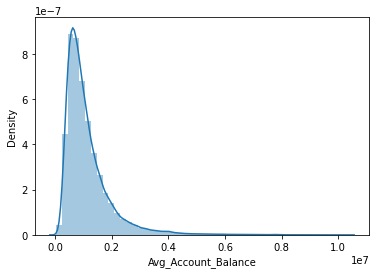

In [27]:
sns.distplot(train['Avg_Account_Balance'])
plt.show()

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


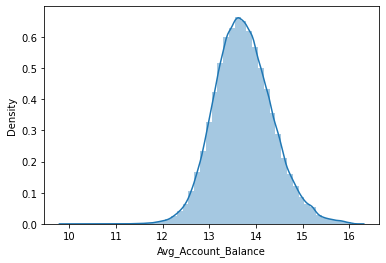

In [29]:
train['Avg_Account_Balance'] = np.log(train['Avg_Account_Balance'])
sns.distplot(train['Avg_Account_Balance'])
plt.show()

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vintage', ylabel='Density'>

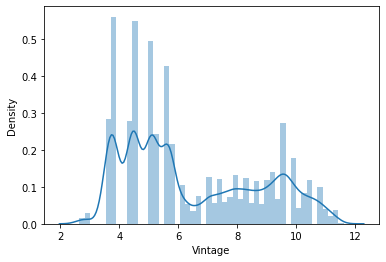

In [91]:
sns.distplot(test['Vintage'])

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vintage'>

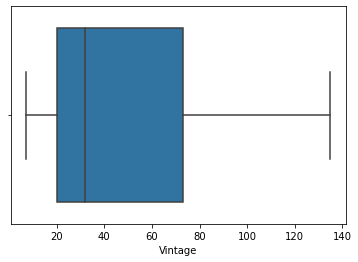

In [86]:
sns.boxplot(train['Vintage'])

In [28]:
train.dtypes

Gender                   int64
Age                      int64
Occupation              object
Channel_Code            object
Vintage                  int64
Credit_Product           int64
Avg_Account_Balance    float64
Is_Active                int64
Is_Lead                  int64
dtype: object

In [108]:
train_feature=pd.concat([train_num, train_dummy], axis = 1)
test_feature=pd.concat([test_num, test_dummy ], axis = 1)

In [109]:
X=train_feature.drop('Is_Lead',axis=1)

In [110]:
y=train_feature['Is_Lead']

In [111]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [33]:
#Logistic Regression

In [112]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_train = logreg.predict(x_test)

C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score 0.8052497710855632
[[33558  5864]
 [ 3707  6016]]
Precision : 0.5063973063973064
Recall : 0.6187390723027872
Specificity : 0.8512505707472985
F1 Score : 0.5569596815257141
Accuracy : 0.8052497710855632
kappa value: 0.43374394550662376


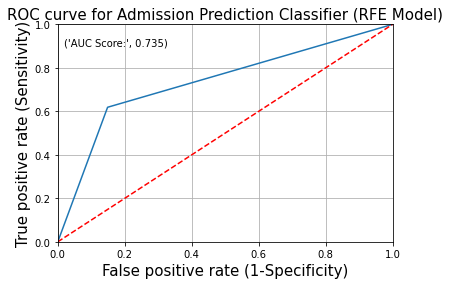

In [113]:
print('Accuracy Score',metrics.accuracy_score(y_pred_train,y_test))
cm = metrics.confusion_matrix(y_pred_train, y_test)
print(cm)
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
precision = TP / (TP+FP)
print('Precision :',precision)
recall = TP / (TP+FN)
print('Recall :',recall)
specificity = TN / (TN+FP)
print('Specificity :',specificity)
f1_score = 2*((precision*recall)/(precision+recall))
print('F1 Score :',f1_score)
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy :',accuracy)
fpr, tpr, thresholds = roc_curve(y_pred_train, y_test)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Admission Prediction Classifier (RFE Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_pred_train, y_test),4)))
plt.grid(True)
kappa = cohen_kappa_score(y_pred_train, y_test)
print('kappa value:',kappa)

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


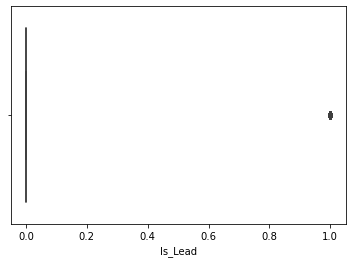

In [30]:
sns.boxplot(train['Is_Lead'])
plt.show()

In [ ]:
#Gradient Boosting

In [114]:
gboost_model = GradientBoostingClassifier(n_estimators = 100, max_depth = 3, random_state = 8)
gboost_model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=8)

In [115]:
y_pred_gb = gboost_model.predict(x_test)

print('The accuracy score is ', round(accuracy_score(y_test, y_pred_gb), 4))

The accuracy score is  0.8234


Accuracy Score 0.8234001424356496
[[33804  5218]
 [ 3461  6662]]
Precision : 0.5607744107744108
Recall : 0.6581053047515558
Specificity : 0.8662805596842806
F1 Score : 0.6055537881198018
Accuracy : 0.8234001424356496
kappa value: 0.4927189954655361


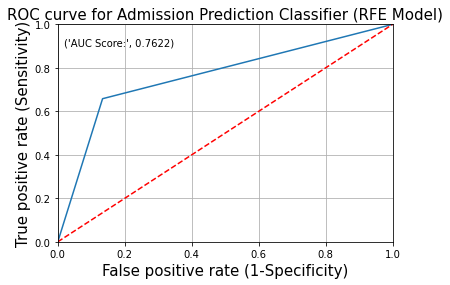

In [72]:
print('Accuracy Score',metrics.accuracy_score(y_pred_gb,y_test))
cm = metrics.confusion_matrix(y_pred_gb, y_test)
print(cm)
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
precision = TP / (TP+FP)
print('Precision :',precision)
recall = TP / (TP+FN)
print('Recall :',recall)
specificity = TN / (TN+FP)
print('Specificity :',specificity)
f1_score = 2*((precision*recall)/(precision+recall))
print('F1 Score :',f1_score)
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy :',accuracy)
fpr, tpr, thresholds = roc_curve(y_pred_gb, y_test)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Admission Prediction Classifier (RFE Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_pred_gb, y_test),4)))
plt.grid(True)
kappa = cohen_kappa_score(y_pred_gb, y_test)
print('kappa value:',kappa)

In [76]:
x_pred=gboost_model.predict(test_feature)

In [82]:
final_predictions = gboost_model.predict_proba(test_feature)
submission['Is_Lead'] = final_predictions

In [36]:
#Ada boost Classifier

In [37]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(x_train, y_train)
y_pred_ada = ada_model.predict(x_test)
print("The Accuracy is: ", round(accuracy_score(y_test, y_pred_ada), 4))

The Accuracy is:  0.8139


In [38]:
#XGB Classifier

In [39]:
tuned_paramaters = [{'n_estimators': [100],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
                     'gamma': [2],
                     'max_depth': [2, 3, 4, 5, 6]}]

In [41]:
#xgb_model = XGBClassifier(random_state = 8, n_jobs=-1)
#xgb_grid = GridSearchCV(estimator = xgb_model,param_grid=tuned_paramaters,cv = 5,n_jobs=-1)
#xgb_grid.fit(x_train, y_train)
#y_pred_xgb = xgb_grid.predict(x_test)
#print(classification_report(y_test, y_pred_xgb))

In [42]:
#Stacking classifier

base_learners = [('Decision Tree', DecisionTreeClassifier()),
                 ('Random Forest', RandomForestClassifier())]
stack_model_AdaBoost = StackingClassifier(estimators = base_learners, final_estimator = AdaBoostClassifier(random_state = 8))
stack_model_AdaBoost.fit(x_train, y_train)

StackingClassifier(estimators=[('Decision Tree', DecisionTreeClassifier()),
                               ('Random Forest', RandomForestClassifier())],
                   final_estimator=AdaBoostClassifier(random_state=8))

In [43]:
y_pred_prob = stack_model_AdaBoost.predict_proba(x_test)[:, 1]

print('AUC score for the model with AdaBoost as final estimator:', roc_auc_score(y_test, y_pred_prob))

AUC score for the model with AdaBoost as final estimator: 0.812826064662909


In [55]:
ada_model = AdaBoostClassifier(learning_rate = 0.15, 
                               n_estimators = 350, 
                               random_state = 10)

In [56]:
scores = cross_val_score(estimator = ada_model, 
                         X = x_train, 
                         y = y_train, 
                         cv = 10, 
                         scoring = 'roc_auc')

In [54]:
print("Mean ROC-AUC score after 10 fold cross validation: ", scores)

Mean ROC-AUC score after 10 fold cross validation:  [0.83485582 0.8354841  0.83978288 0.83536684 0.84170029 0.84385653
 0.83839367 0.83565638 0.84362309 0.83718341]


In [57]:
ada_model.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.15, n_estimators=350, random_state=10)

In [58]:
ada_test_pred=ada_model.predict(x_test)

In [59]:
print("The Accuracy is: ", round(accuracy_score(y_test, ada_test_pred), 4))

The Accuracy is:  0.8121


Accuracy Score 0.8121273781666497
[[34286  2979]
 [ 6254  5626]]
Precision : 0.6538059267867519
Recall : 0.4735690235690236
Specificity : 0.9200590366295451
F1 Score : 0.5492799609470345
Accuracy : 0.8121273781666497
kappa value: 0.428203142962692


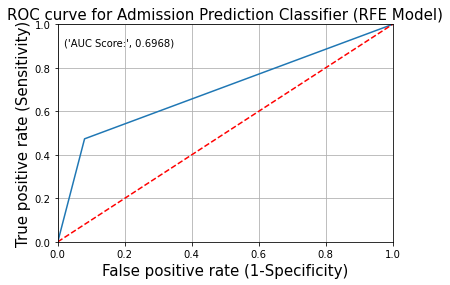

In [60]:
print('Accuracy Score',metrics.accuracy_score(y_test, ada_test_pred))
cm = metrics.confusion_matrix(y_test, ada_test_pred)
print(cm)
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
precision = TP / (TP+FP)
print('Precision :',precision)
recall = TP / (TP+FN)
print('Recall :',recall)
specificity = TN / (TN+FP)
print('Specificity :',specificity)
f1_score = 2*((precision*recall)/(precision+recall))
print('F1 Score :',f1_score)
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy :',accuracy)
fpr, tpr, thresholds = roc_curve(y_test, ada_test_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Admission Prediction Classifier (RFE Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, ada_test_pred),4)))
plt.grid(True)
kappa = cohen_kappa_score(y_pred_train, y_test)
print('kappa value:',kappa)

In [66]:
submission = pd.read_csv('sample_submission_eyYijxG.csv')

In [ ]:
final_predictions = stack_model_AdaBoost.predict_proba(test_feature)[:, 1]
submission['Is_Lead'] = final_predictions

In [83]:
submission.to_csv('sample_submission_eyYijxG.csv', index=False)

In [84]:
submission.head()

,ID,Is_Lead
0,VBENBARO,0.887327
1,CCMEWNKY,0.650770
2,VK3KGA9M,0.947980
3,TT8RPZVC,0.968791
4,SHQZEYTZ,0.968791
